In [0]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
news = pd.read_csv("news-list.csv", sep=";")

In [3]:
news.head

<bound method NDFrame.head of                                                    data  type
0     Lula não se conforma e diz que foi traído pelo...  fake
1     Se o Brasil não apoiar a Lava-Jato,  vagabundo...  fake
2     Apresentadora do SBT diz que não aguenta mais:...  fake
3     Bonner e namorada usam GOL GTS para dar um "ro...  fake
4     Lava-Jato ia pedir a prisão de Lula hoje (17),...  fake
...                                                 ...   ...
7195  Acusações complicam candidatura de governador ...  true
7196  Operação da PF investiga compra de tablets com...  true
7197  PF faz buscas em endereços de pessoas ligadas ...  true
7198  Capitães da Areia: o dia em que o Estado Novo ...  true
7199  Pegada de Macaco, Rolo Compressor, Ritmo Forte...  true

[7200 rows x 2 columns]>

In [4]:
y = news.type
print(y)

0       fake
1       fake
2       fake
3       fake
4       fake
        ... 
7195    true
7196    true
7197    true
7198    true
7199    true
Name: type, Length: 7200, dtype: object


In [0]:
news = news.drop('type', axis=1)

In [6]:
news

,data
0,Lula não se conforma e diz que foi traído pelo...
1,"Se o Brasil não apoiar a Lava-Jato, vagabundo..."
2,Apresentadora do SBT diz que não aguenta mais:...
3,"Bonner e namorada usam GOL GTS para dar um ""ro..."
4,"Lava-Jato ia pedir a prisão de Lula hoje (17),..."
...,...
7195,Acusações complicam candidatura de governador ...
7196,Operação da PF investiga compra de tablets com...
7197,PF faz buscas em endereços de pessoas ligadas ...
7198,Capitães da Areia: o dia em que o Estado Novo ...


In [0]:
#n_processed = []
#for i in range(len(news['data'])):
#    tokenizedText = nltk.word_tokenize(news['data'][i], language='portuguese')
#    stemmedText = [t for t in tokenizedText if t not in stopwords]
#    news['data'][i] = " ".join(stemmedText)
    


In [7]:
news['data'][1]

'Se o Brasil não apoiar a Lava-Jato,  vagabundos tomarão conta de tudo! (assista o vídeo da Transparência Internacional).  No Brasil,  foram perdidos bilhões de dólares devido à corrupção.  A Lava-Jato se tornou uma das maiores investigações contra corruptos do mundo. 118 pessoas já foram condenadas,  totalizando 1.256 anos de prisão. Essa operação não pode parar!\n'

In [0]:
news_train, news_test, type_train, type_test = train_test_split(news['data'], y, test_size=0.33, random_state=53)

In [9]:
news_test

319     Empresário diz À PF que obras no sítio de Atib...
7155    SÃO PAULO - Nas prateleiras de dezenas de bibl...
6718    Após reunião com secretário de Estado dos EUA,...
4142    PF diz que uso de algemas nos pés e nas mãos d...
4536    Moraes foi filiado ao PSDB, é constitucionalis...
                              ...                        
1493    Zuckerberg se manifesta com relação às eleiçõe...
3818    Investigadores usam diagrama para explicar atu...
1176    Kajuru publica áudio e diz que não tem medo de...
5310    O juiz federal Sérgio Moro ordenou o bloqueio ...
605     Mais um ministro de Temer na cadeia. No dia em...
Name: data, Length: 2376, dtype: object

In [10]:
import nltk
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stemmer = SnowballStemmer('portuguese') 
stopwords = nltk.corpus.stopwords.words('portuguese')

print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(news_train)
tfidf_test = tfidf_vectorizer.transform(news_test)

In [13]:
tfidf_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.846
Confusion matrix, without normalization


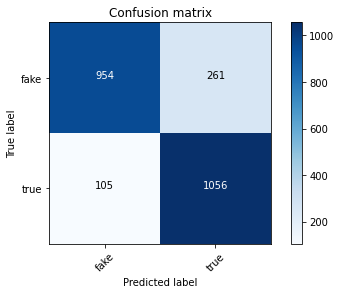

In [15]:
clf = MultinomialNB()
clf.fit(tfidf_train, type_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(type_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(type_test, pred, labels=['fake', 'true'])
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [0]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(news_train)
count_test = count_vectorizer.transform(news_test)

accuracy:   0.918
Confusion matrix, without normalization


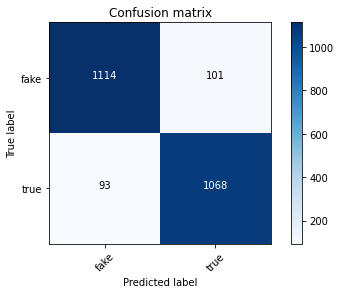

In [17]:
linear_clf = PassiveAggressiveClassifier(max_iter=1000)
linear_clf.fit(tfidf_train, type_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(type_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(type_test, pred, labels=['fake', 'true'])
plot_confusion_matrix(cm, classes=['fake', 'true'])

accuracy:   0.859
Confusion matrix, without normalization


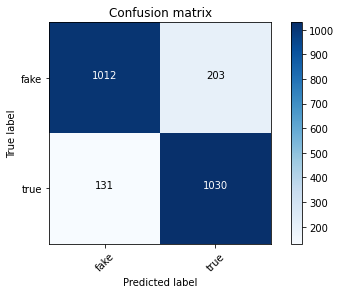

In [18]:
clf.fit(count_train, type_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(type_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(type_test, pred, labels=['fake', 'true'])
plot_confusion_matrix(cm, classes=['fake', 'true'])